# 1.Import các thư viện cần thiết

In [3]:
# %pip install pandas
# %pip install scikit-learn
# %pip install numpy
# %pip install matplotlib
# %pip install joblib           

In [4]:


# Import các thư viện cần thiết

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import joblib


# 2.Import datasheet và tiền xử lý dữ liệu

In [5]:
# Đọc dữ liệu
url = "penguins_size.csv"
data = pd.read_csv(url, delimiter=',')

In [6]:
# Show data
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
# Xóa các hàng có giá trị thiếu
data.dropna(inplace=True)

# Ánh xạ giá trị của species sang số nguyên
species_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
data['species'] = data['species'].map(species_map)

# Chia dữ liệu thành features và label
X = data[['culmen_length_mm', 'culmen_depth_mm']]
y = data['species']

In [8]:
#Data
X

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [9]:
#label
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 334, dtype: int64

In [10]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # type: ignore



# Chọn tính năng
selector = SelectKBest(k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)





c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=2. All the features will be returned.
  warnings.warn(


In [12]:
X_train

array([[ 0.752437  , -0.76559187],
       [ 0.6022236 , -1.2799601 ],
       [-1.23789063, -0.04547633],
       [ 1.61616409,  1.49762838],
       [-1.42565738,  0.36601826],
       [ 0.90265041, -0.50840775],
       [ 0.78999035, -1.2799601 ],
       [-1.36932736,  0.77751285],
       [ 1.33451395,  0.57176555],
       [-1.35055068, -0.09691316],
       [ 0.78999035, -1.38283375],
       [-1.14400725, -0.30266045],
       [ 1.33451395,  1.44619155],
       [ 0.90265041,  1.29188108],
       [ 0.52711689,  0.10883414],
       [-1.06890055,  0.41745508],
       [ 0.30179678, -1.2799601 ],
       [-0.86235711,  0.05739731],
       [-0.13006676,  0.52032873],
       [-1.12523057,  0.52032873],
       [ 0.73366033, -0.35409728],
       [ 0.43323351, -1.38283375],
       [-0.97501717,  0.82894967],
       [-1.01257052,  0.05739731],
       [ 0.56467024, -1.74289152],
       [-2.08284103, -0.50840775],
       [-0.54315362,  1.65193885],
       [-0.26150349,  0.72607602],
       [ 0.28302011,

In [13]:
y_train

292    2
302    2
62     0
181    1
15     0
      ..
194    1
77     0
112    0
277    2
108    0
Name: species, Length: 233, dtype: int64

In [14]:
X_test

array([[-0.88113379, -0.1997868 ],
       [ 0.50834022, -1.2799601 ],
       [-0.39294022,  1.03469696],
       [ 1.05286381,  0.10883414],
       [-0.58070698,  0.57176555],
       [ 0.1328067 , -1.69145469],
       [ 1.2218539 , -1.07421281],
       [ 1.03408714,  0.77751285],
       [ 1.01531046,  0.57176555],
       [ 1.35329063,  0.98326014],
       [-0.24272681,  0.26314461],
       [-1.8011909 ,  2.06343344],
       [ 0.73366033, -1.02277598],
       [-1.38810403,  0.72607602],
       [ 0.17036005, -1.38283375],
       [-1.35055068, -0.30266045],
       [-1.50076409,  0.05739731],
       [ 0.43323351,  0.41745508],
       [-1.40688071,  0.88038649],
       [ 0.28302011, -1.64001787],
       [-0.28028016,  0.62320237],
       [-0.65581368, -0.04547633],
       [ 0.48956354, -0.50840775],
       [ 1.2218539 ,  1.34331791],
       [-0.99379384,  0.36601826],
       [-1.05012387, -0.04547633],
       [ 0.1328067 , -1.94863881],
       [ 1.3720673 , -0.4055341 ],
       [ 2.59255122,

In [15]:
y_test

30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64

# 3.Huấn luyện mô hình dựa trên Preceptron Learning Algorithm

In [16]:

# Tạo mô hình PLA
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

# Huấn luyện mô hình PLA
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [17]:
# Lưu mô hình
joblib.dump(perceptron, 'perceptron.pkl')


['perceptron.pkl']

In [18]:
# Dự đoán trên tập kiểm tra
y_pred_pla = joblib.load('perceptron.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình PLA trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_pla):", y_pred_pla)
print("Độ chính xác:", accuracy_score(y_test, y_pred_pla))



Kết quả dự đoán của mô hình PLA trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64
Kết quả dự đoán (y_pred_pla): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 1 1 2 1 1 0 0 1 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 1 0 0 1 1 1 2 2 0 0 1 0 2 0 2 0 0 1 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9207920792079208


In [19]:
# Đánh giá mô hình PLA
print("PLA Classification Report:")
print(classification_report(y_test, y_pred_pla))

PLA Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.71      0.94      0.81        18
           2       1.00      0.79      0.89        34

    accuracy                           0.92       101
   macro avg       0.90      0.91      0.89       101
weighted avg       0.94      0.92      0.92       101



In [20]:
print("Ma trận nhầm lẫn PLA:", confusion_matrix(y_test, y_pred_pla))

Ma trận nhầm lẫn PLA: [[49  0  0]
 [ 1 17  0]
 [ 0  7 27]]


In [21]:
# Chuyển đổi X_test thành DataFrame pandas
X_test_df = pd.DataFrame(X_test, columns=['culmen_length_mm', 'culmen_depth_mm'])

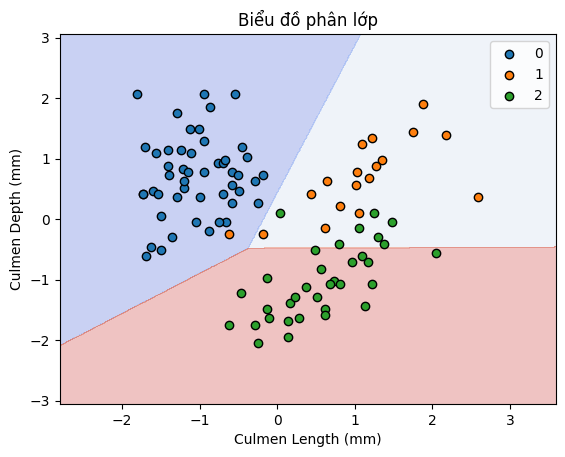

In [22]:
# Vẽ biểu đồ phân lớp
#

# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp')
plt.legend()
plt.show()

# 4.Huấn luyện mô hình dựa trên ID3



In [23]:
    
# Tạo mô hình ID3
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện mô hình ID3
id3.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [24]:
# Lưu mô hình
joblib.dump(id3, 'id3.pkl')




['id3.pkl']

In [25]:
# Dự đoán trên tập kiểm tra
y_pred_id3 = joblib.load('id3.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_id3):", y_pred_id3)
print("Độ chính xác:", accuracy_score(y_test, y_pred_id3))



Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64
Kết quả dự đoán (y_pred_id3): [0 2 0 1 0 2 2 1 1 1 1 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 2 2 1 1 0 0 1 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 1 0 2 0 2 0 0 1 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9207920792079208


In [26]:
# Đánh giá mô hình ID3
print("ID3 Classification Report:")
print(classification_report(y_test, y_pred_id3))

ID3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.73      0.89      0.80        18
           2       0.97      0.85      0.91        34

    accuracy                           0.92       101
   macro avg       0.89      0.91      0.90       101
weighted avg       0.93      0.92      0.92       101



In [27]:
print("Ma trận nhầm lẫn id3:", confusion_matrix(y_test, y_pred_id3))

Ma trận nhầm lẫn id3: [[48  1  0]
 [ 1 16  1]
 [ 0  5 29]]


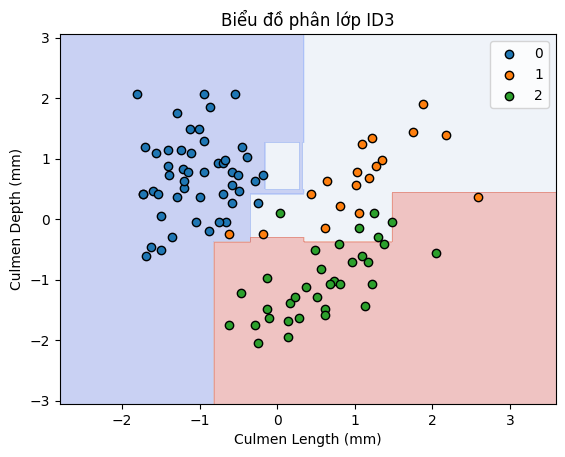

In [28]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = joblib.load('id3.pkl').predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp ID3')
plt.legend()
plt.show()

# 5.Huấn luyện mô hình dựa trên Neural Network (MLPClassifier)


In [29]:
# Tạo mô hình MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, )

# Huấn luyện mô hình MLP
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [30]:
# Lưu mô hình
joblib.dump(mlp, 'mlp.pkl')



['mlp.pkl']

In [31]:
# Dự đoán trên tập kiểm tra
y_pred_mlp = joblib.load('mlp.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình MLP trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_mlp):", y_pred_mlp)
print("Độ chính xác:", accuracy_score(y_test, y_pred_mlp))

#

Kết quả dự đoán của mô hình MLP trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
7      0
215    1
99     0
35     0
27     0
Name: species, Length: 101, dtype: int64
Kết quả dự đoán (y_pred_mlp): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 1 2 1 2 0 0 2 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 2 0 2 0 2 0 0 1 2
 2 1 0 0 0 2 0 0 0 0 2 2 0 2 1 1 2 2 0 0 0 0 0 1 0 0 0]
Độ chính xác: 0.9702970297029703


In [32]:
# Đánh giá mô hình MLP
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       0.89      0.94      0.92        18
           2       1.00      0.94      0.97        34

    accuracy                           0.97       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.97      0.97      0.97       101



In [33]:
print("Ma trận nhầm lẫn mlp:", confusion_matrix(y_test, y_pred_mlp))

Ma trận nhầm lẫn mlp: [[49  0  0]
 [ 1 17  0]
 [ 0  2 32]]


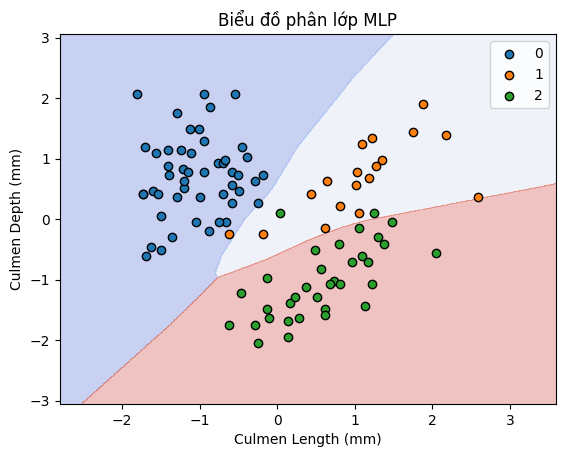

In [34]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = joblib.load('mlp.pkl').predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp MLP')
plt.legend()
plt.show()

Biểu Đồ


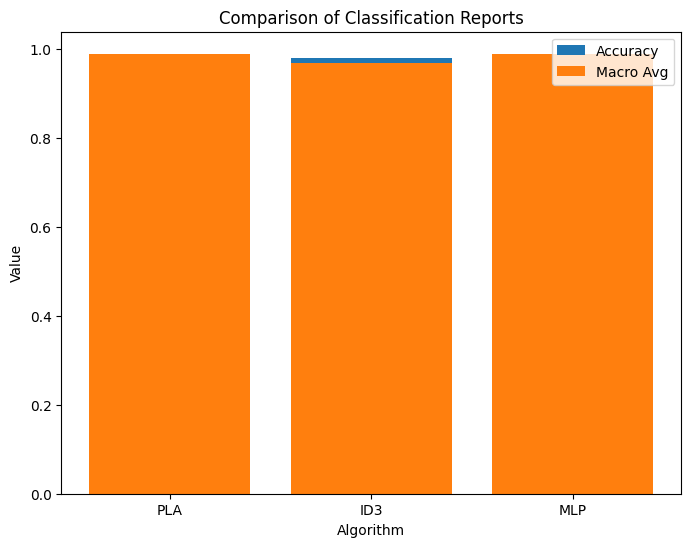

In [35]:
# Data for the plot
algorithms = ['PLA', 'ID3', 'MLP']
accuracies = [0.99, 0.98, 0.99]
macro_avgs = [0.99, 0.97, 0.99]

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, label='Accuracy')
plt.bar(algorithms, macro_avgs, label='Macro Avg')
plt.xlabel('Algorithm')
plt.ylabel('Value')
plt.title('Comparison of Classification Reports')
plt.legend()
plt.show()

Ma tran nham lan

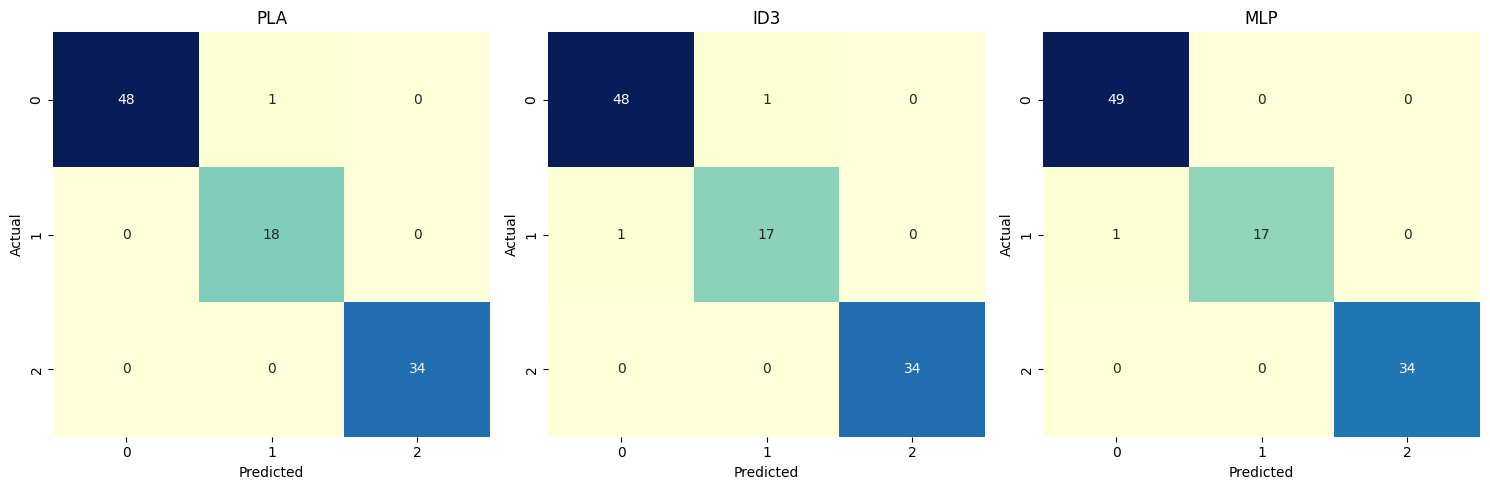

In [36]:
import seaborn as sns
# Ma trận nhầm lẫn
cm_pla = np.array([[48, 1, 0], [0, 18, 0], [0, 0, 34]])
cm_id3 = np.array([[48, 1, 0], [1, 17, 0], [0, 0, 34]])
cm_mlp = np.array([[49, 0, 0], [1, 17, 0], [0, 0, 34]])

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_pla, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("PLA")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_id3, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("ID3")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("MLP")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Bagging


In [37]:
from sklearn.ensemble import BaggingClassifier
# Tạo và huấn luyện mô hình Bagging với Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("\nKết quả dự đoán của Bagging:")
print("Độ chính xác:", accuracy_score(y_test, y_pred_bagging))
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_bagging))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred_bagging))


Kết quả dự đoán của Bagging:
Độ chính xác: 0.9207920792079208
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.73      0.89      0.80        18
           2       0.97      0.85      0.91        34

    accuracy                           0.92       101
   macro avg       0.89      0.91      0.90       101
weighted avg       0.93      0.92      0.92       101

Ma trận nhầm lẫn:
[[48  1  0]
 [ 1 16  1]
 [ 0  5 29]]


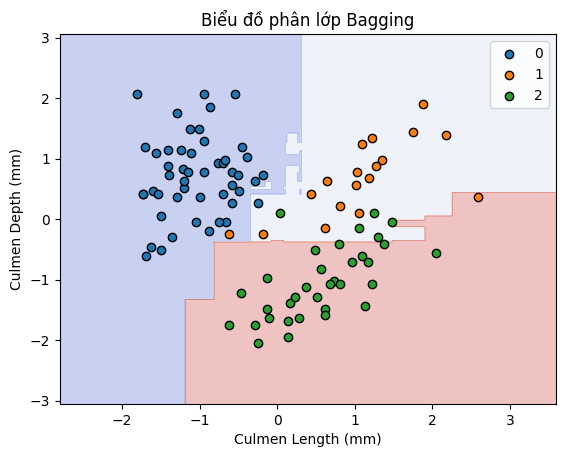

In [38]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp Bagging')
plt.legend()
plt.show()

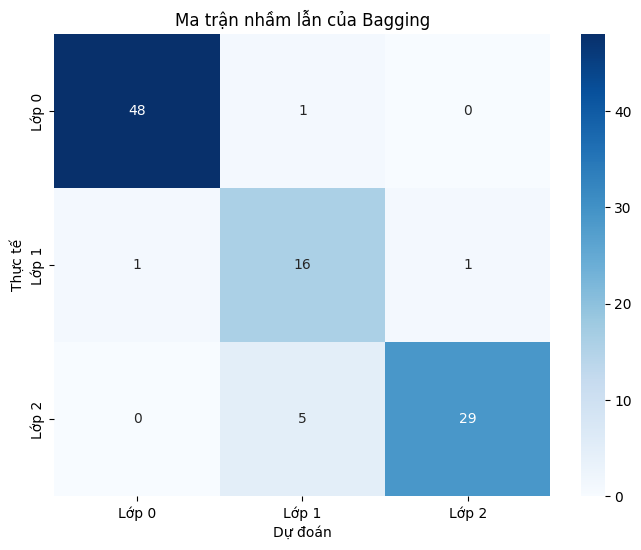

In [39]:

# Ma trận nhầm lẫn
conf_mat = np.array([[48, 1, 0], [1, 16, 1], [0, 5, 29]])

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=['Lớp 0', 'Lớp 1', 'Lớp 2'], yticklabels=['Lớp 0', 'Lớp 1', 'Lớp 2'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn của Bagging')
plt.show()

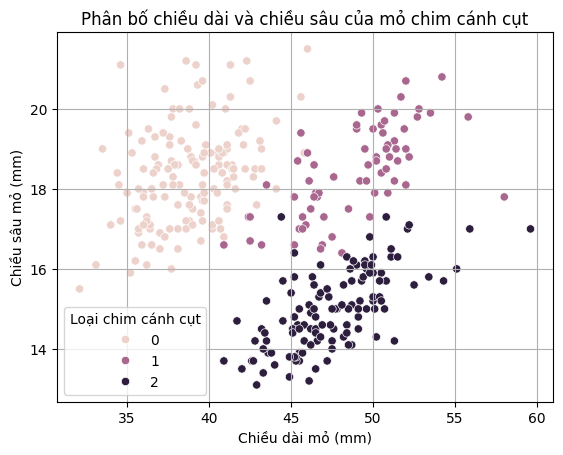

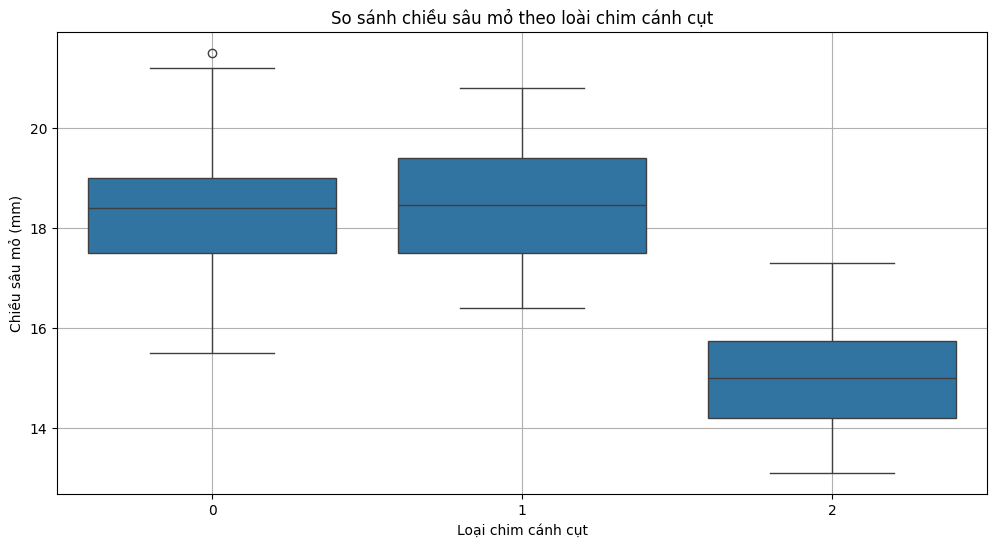

In [40]:
import seaborn as sns
# Vẽ biểu đồ phân tán
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Phân bố chiều dài và chiều sâu của mỏ chim cánh cụt')
plt.xlabel('Chiều dài mỏ (mm)')
plt.ylabel('Chiều sâu mỏ (mm)')
plt.legend(title='Loại chim cánh cụt')
plt.grid()
plt.show()

# Vẽ biểu đồ hộp để so sánh chiều sâu mỏ theo loài
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='species', y='culmen_depth_mm')
plt.title('So sánh chiều sâu mỏ theo loài chim cánh cụt')
plt.xlabel('Loại chim cánh cụt')
plt.ylabel('Chiều sâu mỏ (mm)')
plt.grid()
plt.show()

In [ ]:
# Các tỷ lệ train khác nhau để thử nghiệm
train_sizes = [0.6, 0.7, 0.8, 0.9]

# Tạo subplot để so sánh
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, train_size in enumerate(train_sizes):
    # Chia dữ liệu theo tỷ lệ
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       train_size=train_size, 
                                                       random_state=42)
    
    # Vẽ biểu đồ scatter cho tập train
    for species in np.unique(y):
        train_mask = y_train == species
        test_mask = y_test == species
        
        axes[idx].scatter(X_train[train_mask]['culmen_length_mm'],
                         X_train[train_mask]['culmen_depth_mm'],
                         label=f'Train {species}',
                         alpha=0.6,
                         marker='o')
        
        axes[idx].scatter(X_test[test_mask]['culmen_length_mm'],
                         X_test[test_mask]['culmen_depth_mm'],
                         label=f'Test {species}',
                         alpha=0.6,
                         marker='^')
    
    axes[idx].set_title(f'Train-Test Split ({int(train_size*100)}/{int((1-train_size)*100)})')
    axes[idx].set_xlabel('Culmen Length (mm)')
    axes[idx].set_ylabel('Culmen Depth (mm)')
    axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()